In [10]:
import pandas as pd
import numpy as np
from scipy.stats import ttest_ind, mannwhitneyu, shapiro

import matplotlib.pyplot as plt
%matplotlib inline

## Description
#pandas (pd): Used for data manipulation and analysis.
#numpy (np): Adds support for large, multi-dimensional arrays and mathematical functions.
#scipy.stats: Provides statistical tests:
#ttest_ind: Two-sample t-test. mannwhitneyu: Non-parametric test for two independent samples (not used in this code but imported). shapiro: Shapiro-Wilk test for normality.
# matplotlib.pyplot: Used for creating visualizations.
# %matplotlib inline: Ensures plots are displayed inline in Jupyter notebooks.

control_df = pd.read_csv("control_group.csv", sep=";") 
test_df = pd.read_csv("test_group.csv", sep=";") 

In [12]:
def summarize_data(control, test):
    print("Control Group Summary:")
    print(control.describe().T)
    print("\nTest Group Summary:")
    print(test.describe().T)

summarize_data(control_df, test_df)

Control Group Summary:
                     count           mean           std      min      25%  \
Spend [USD]           30.0    2288.433333    367.334451   1757.0   1945.5   
# of Impressions      29.0  109559.758621  21688.922908  71274.0  92029.0   
Reach                 29.0   88844.931034  21832.349595  42859.0  74192.0   
# of Website Clicks   29.0    5320.793103   1757.369003   2277.0   4085.0   
# of Searches         29.0    2221.310345    866.089368   1001.0   1615.0   
# of View Content     29.0    1943.793103    777.545469    848.0   1249.0   
# of Add to Cart      29.0    1300.000000    407.457973    442.0    930.0   
# of Purchase         29.0     522.793103    185.028642    222.0    372.0   

                          50%       75%       max  
Spend [USD]            2299.5    2532.0    3083.0  
# of Impressions     113430.0  121332.0  145248.0  
Reach                 91579.0  102479.0  127852.0  
# of Website Clicks    5224.0    6628.0    8137.0  
# of Searches          

In [2]:
# Control Group Dataset
control_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Control Campaign,1.08.2019,2280,82702.0,56930.0,7016.0,2290.0,2159.0,1819.0,618.0
1,Control Campaign,2.08.2019,1757,121040.0,102513.0,8110.0,2033.0,1841.0,1219.0,511.0
2,Control Campaign,3.08.2019,2343,131711.0,110862.0,6508.0,1737.0,1549.0,1134.0,372.0
3,Control Campaign,4.08.2019,1940,72878.0,61235.0,3065.0,1042.0,982.0,1183.0,340.0
4,Control Campaign,5.08.2019,1835,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [3]:
# Test Group Dataset
test_df.head()

,Campaign Name,Date,Spend [USD],# of Impressions,Reach,# of Website Clicks,# of Searches,# of View Content,# of Add to Cart,# of Purchase
0,Test Campaign,1.08.2019,3008,39550,35820,3038,1946,1069,894,255
1,Test Campaign,2.08.2019,2542,100719,91236,4657,2359,1548,879,677
2,Test Campaign,3.08.2019,2365,70263,45198,7885,2572,2367,1268,578
3,Test Campaign,4.08.2019,2710,78451,25937,4216,2216,1437,566,340
4,Test Campaign,5.08.2019,2297,114295,95138,5863,2106,858,956,768


In [4]:
# Summary of Control Group
control_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2288.433333,367.334451,1757.0,1945.5,2299.5,2532.0,3083.0
# of Impressions,29.0,109559.758621,21688.922908,71274.0,92029.0,113430.0,121332.0,145248.0
Reach,29.0,88844.931034,21832.349595,42859.0,74192.0,91579.0,102479.0,127852.0
# of Website Clicks,29.0,5320.793103,1757.369003,2277.0,4085.0,5224.0,6628.0,8137.0
# of Searches,29.0,2221.310345,866.089368,1001.0,1615.0,2390.0,2711.0,4891.0
# of View Content,29.0,1943.793103,777.545469,848.0,1249.0,1984.0,2421.0,4219.0
# of Add to Cart,29.0,1300.000000,407.457973,442.0,930.0,1339.0,1641.0,1913.0
# of Purchase,29.0,522.793103,185.028642,222.0,372.0,501.0,670.0,800.0


In [5]:
# Summary of Test Group
test_df.describe().T

,count,mean,std,min,25%,50%,75%,max
Spend [USD],30.0,2563.066667,348.687681,1968.0,2324.50,2584.0,2836.25,3112.0
# of Impressions,30.0,74584.800000,32121.377422,22521.0,47541.25,68853.5,99500.00,133771.0
Reach,30.0,53491.566667,28795.775752,10598.0,31516.25,44219.5,78778.75,109834.0
# of Website Clicks,30.0,6032.333333,1708.567263,3038.0,4407.00,6242.5,7604.75,8264.0
# of Searches,30.0,2418.966667,388.742312,1854.0,2043.00,2395.5,2801.25,2978.0
# of View Content,30.0,1858.000000,597.654669,858.0,1320.00,1881.0,2412.00,2801.0
# of Add to Cart,30.0,881.533333,347.584248,278.0,582.50,974.0,1148.50,1391.0
# of Purchase,30.0,521.233333,211.047745,238.0,298.00,500.0,701.00,890.0


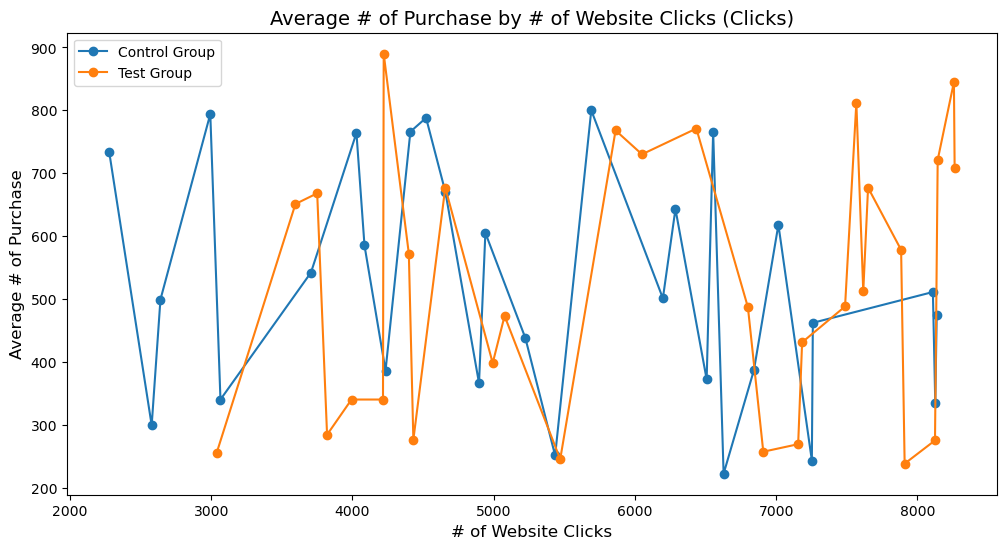

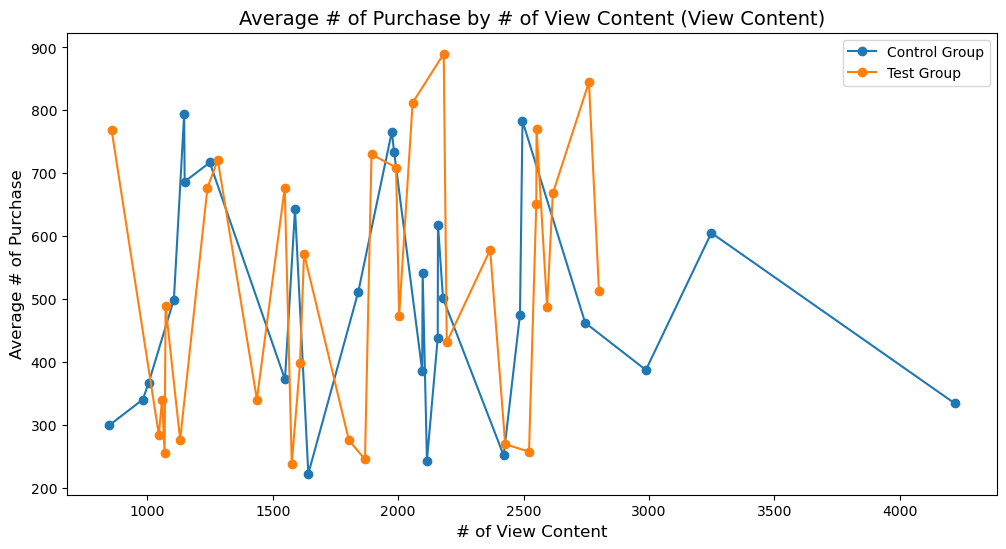

In [14]:
def plot_grouped_means(control, test, group_col, target_col, title):
    control_mean = control.groupby(group_col, as_index=False).agg({target_col: "mean"})
    test_mean = test.groupby(group_col, as_index=False).agg({target_col: "mean"})

    plt.figure(figsize=(12, 6))
    plt.plot(control_mean[group_col], control_mean[target_col], label="Control Group", marker="o")
    plt.plot(test_mean[group_col], test_mean[target_col], label="Test Group", marker="o")
    plt.title(f"Average {target_col} by {group_col} ({title})", fontsize=14)
    plt.xlabel(group_col, fontsize=12)
    plt.ylabel(f"Average {target_col}", fontsize=12)
    plt.legend()
    plt.show()

plot_grouped_means(control_df, test_df, "# of Website Clicks", "# of Purchase", "Clicks")
plot_grouped_means(control_df, test_df, "# of View Content", "# of Purchase", "View Content")

In [6]:
# Average number of purchase by the number of clicks

print(control_df.groupby("# of Website Clicks", as_index=False).agg({"# of Purchase": "mean"}).sort_values(by="# of Purchase", ascending=False).head())
print(test_df.groupby("# of Website Clicks", as_index=False).agg({"# of Purchase": "mean"}).sort_values(by="# of Purchase", ascending=False).head())

    # of Website Clicks  # of Purchase
16               5691.0          800.0
3                2993.0          794.0
10               4521.0          788.0
9                4410.0          766.0
20               6554.0          766.0
    # of Website Clicks  # of Purchase
6                  4221          890.0
28                 8259          845.0
21                 7568          812.0
15                 6435          771.0
13                 5863          768.0


In [7]:
# Average number of purchase by the number of views
print(control_df.groupby("# of View Content", as_index=False).agg({"# of Purchase": "mean"}).sort_values(by="# of Purchase", ascending=False).head())
print(test_df.groupby("# of View Content", as_index=False).agg({"# of Purchase": "mean"}).sort_values(by="# of Purchase", ascending=False).head())

    # of View Content  # of Purchase
4              1147.0          794.0
21             2496.0          783.0
11             1975.0          766.0
12             1984.0          734.0
6              1249.0          717.0
    # of View Content  # of Purchase
19               2182          890.0
28               2761          845.0
18               2058          812.0
25               2552          771.0
0                 858          768.0


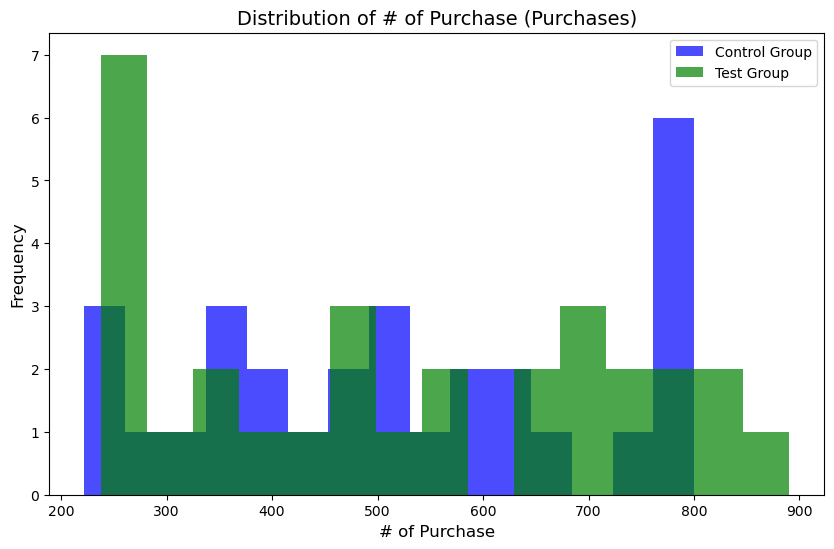

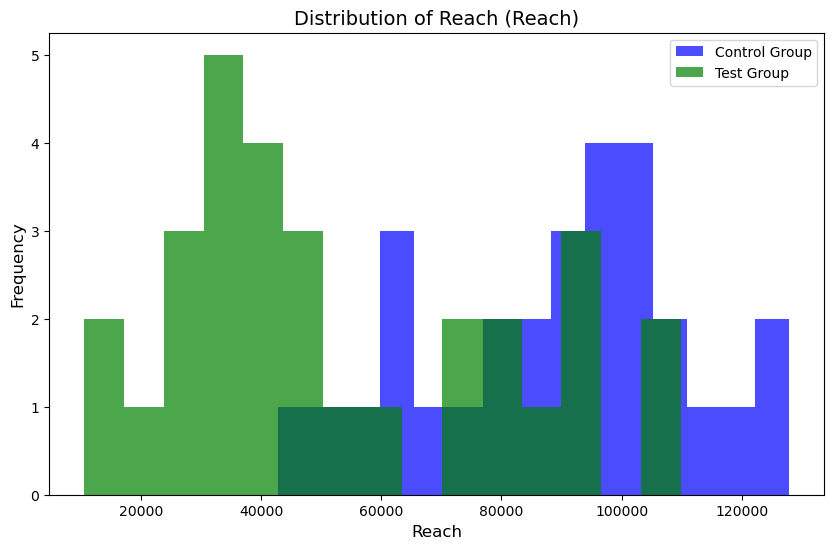

In [16]:
def plot_distributions(control, test, col, title):
    plt.figure(figsize=(10, 6))
    plt.hist(control[col], bins=15, alpha=0.7, label="Control Group", color="blue")
    plt.hist(test[col], bins=15, alpha=0.7, label="Test Group", color="green")
    plt.title(f"Distribution of {col} ({title})", fontsize=14)
    plt.xlabel(col, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)
    plt.legend()
    plt.show()

plot_distributions(control_df, test_df, "# of Purchase", "Purchases")
plot_distributions(control_df, test_df, "Reach", "Reach")

In [8]:
test_df["# of Purchase"].mean()

521.2333333333333

In [9]:
control_df["# of Purchase"].mean()

522.7931034482758

In [10]:
test_stat, pvalue = shapiro(control_df["# of Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))  

test_stat, pvalue = shapiro(test_df["# of Purchase"])
print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = nan, p-value = 1.0000
Test Stat = 0.9182, p-value = 0.0241


In [18]:
def compute_statistics(control, test, col):
    print(f"Mean of {col} (Control): {control[col].mean():.2f}")
    print(f"Mean of {col} (Test): {test[col].mean():.2f}")

    # Normality test
    control_stat, control_p = shapiro(control[col])
    test_stat, test_p = shapiro(test[col])
    print(f"\nShapiro-Wilk Test for {col}:")
    print(f"Control: Test Stat = {control_stat:.4f}, p-value = {control_p:.4f}")
    print(f"Test: Test Stat = {test_stat:.4f}, p-value = {test_p:.4f}")

    # T-test
    t_stat, p_value = ttest_ind(control[col], test[col], equal_var=True)
    print(f"\nT-Test for {col}:")
    print(f"Test Stat = {t_stat:.4f}, p-value = {p_value:.4f}")

compute_statistics(control_df, test_df, "# of Purchase")

Mean of # of Purchase (Control): 522.79
Mean of # of Purchase (Test): 521.23

Shapiro-Wilk Test for # of Purchase:
Control: Test Stat = nan, p-value = nan
Test: Test Stat = 0.9182, p-value = 0.0241

T-Test for # of Purchase:
Test Stat = nan, p-value = nan


In [14]:
test_stat, pvalue = ttest_ind(control_df["# of Purchase"],
                              test_df["# of Purchase"],
                              equal_var=True)

print('Test Stat = %.4f, p-value = %.4f' % (test_stat, pvalue))

Test Stat = nan, p-value = nan


{'whiskers': [<matplotlib.lines.Line2D at 0x7ff313e65f10>,
 'caps': [<matplotlib.lines.Line2D at 0x7ff300cf94f0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7ff313e65c40>,
 'medians': [<matplotlib.lines.Line2D at 0x7ff300cf9a90>,
 'fliers': [<matplotlib.lines.Line2D at 0x7ff300cf9d60>,
 'means': []}

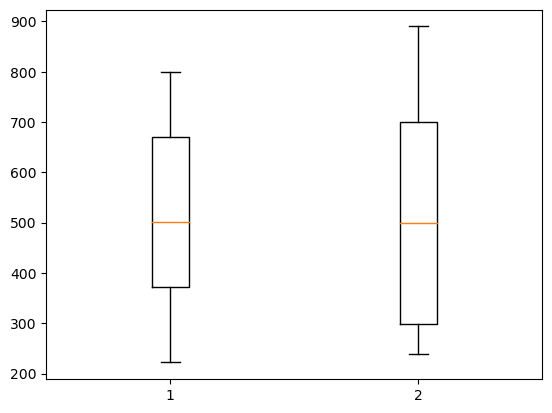

In [11]:
comparison = [control_df["# of Purchase"].dropna(), test_df["# of Purchase"].dropna()]
# dropna(): Removes missing values from the purchase data.
plt.boxplot(comparison)

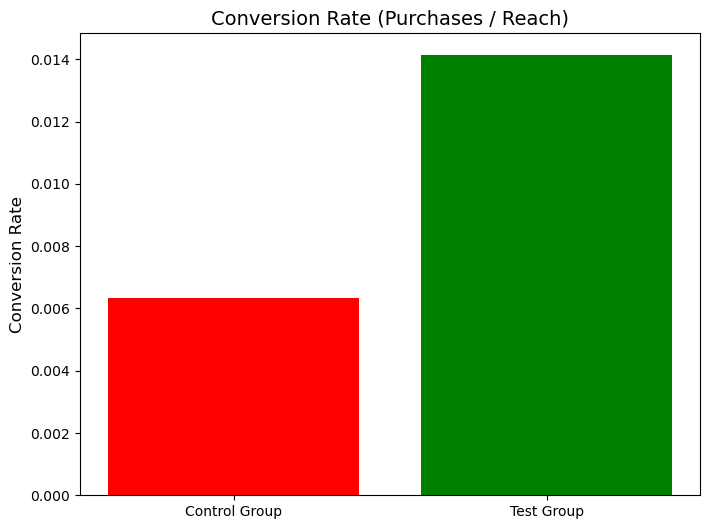

In [30]:
# Conversion rates between the number of purchase and reach

def plot_conversion_rates(control, test):
    control_rate = (control["# of Purchase"] / control["Reach"]).mean()
    test_rate = (test["# of Purchase"] / test["Reach"]).mean()

    plt.figure(figsize=(8, 6))
    plt.bar(["Control Group", "Test Group"], [control_rate, test_rate], color=["red", "green"])
    plt.title("Conversion Rate (Purchases / Reach)", fontsize=14)
    plt.ylabel("Conversion Rate", fontsize=12)
    plt.show()

plot_conversion_rates(control_df, test_df)


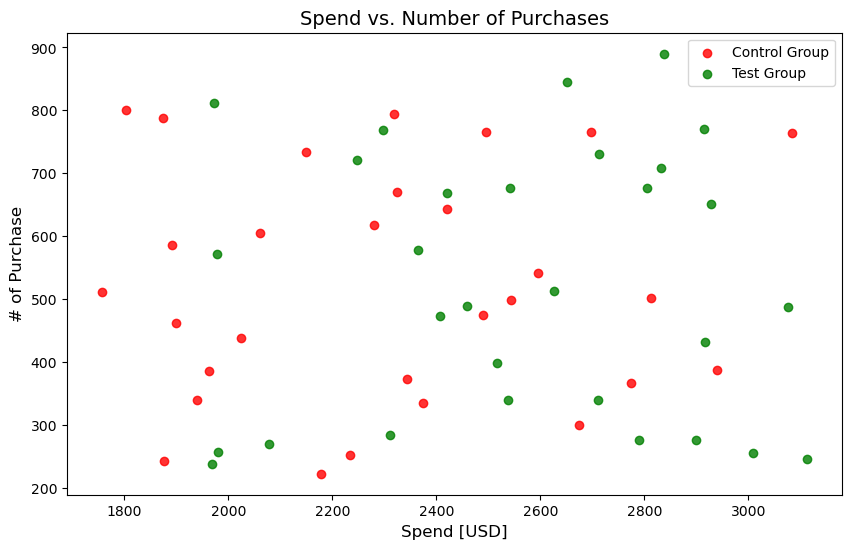

In [38]:
def plot_spend_vs_purchase(control, test):
    plt.figure(figsize=(10, 6))
    plt.scatter(control["Spend [USD]"], control["# of Purchase"], alpha=0.8, label="Control Group", color="red")
    plt.scatter(test["Spend [USD]"], test["# of Purchase"], alpha=0.8, label="Test Group", color="green")
    plt.title("Spend vs. Number of Purchases", fontsize=14)
    plt.xlabel("Spend [USD]", fontsize=12)
    plt.ylabel("# of Purchase", fontsize=12)
    plt.legend()
    plt.show()

plot_spend_vs_purchase(control_df, test_df)